In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
train_data = pd.read_csv("/kaggle/input/competitions/titanic/train.csv")

# Preview the data to make sure it loaded
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


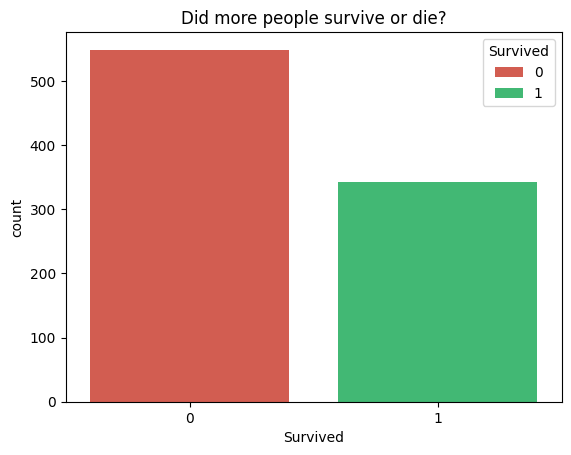

In [3]:
custom_palette = {0: "#E74C3C", 1: "#2ECC71"}
sns.countplot(x='Survived', data=train_data, hue='Survived', palette=custom_palette)
plt.title("Did more people survive or die?")
plt.show()

From the graph I notice that there is a 60% chance that a person would **NOT** survive. Now I need to choose some features to test the survival rate so I can decide to use which one in my model training

My first theory is about gender: **Who has more chance to survive women or man ?**

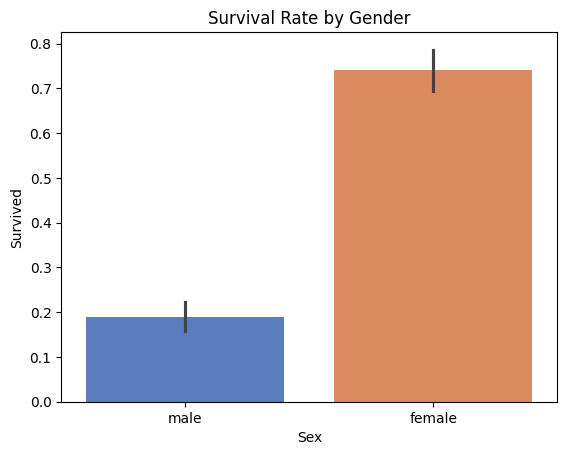

In [4]:
sns.barplot(x='Sex',hue='Sex', legend=False, y='Survived', data=train_data, palette="muted")
plt.title("Survival Rate by Gender")
plt.show()

I noticed that the survival rate for women is suprising high compare to their counterpart. This indicate that the model should use the **Sex** feature <br>
Next I want to see the **class rate (Pclass) effect on survival rate** 

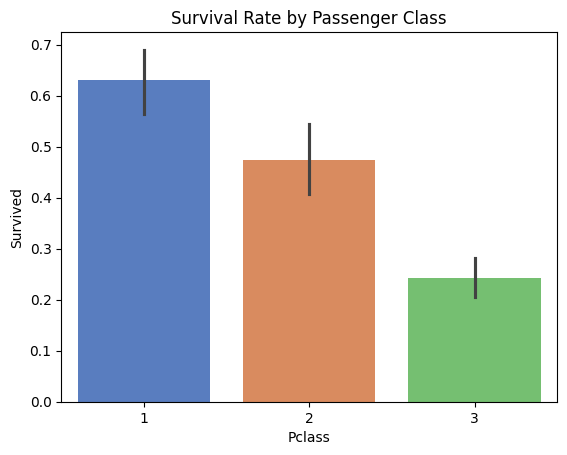

In [5]:
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=train_data, palette="muted", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.show()

It seems that the higher the class rate the higher the chance of survival so the class rate also affect the survival rate.Thus **PClass** feature is also important for the model<br>
My final test is about the age distribution: **Which age group is more protized ?**

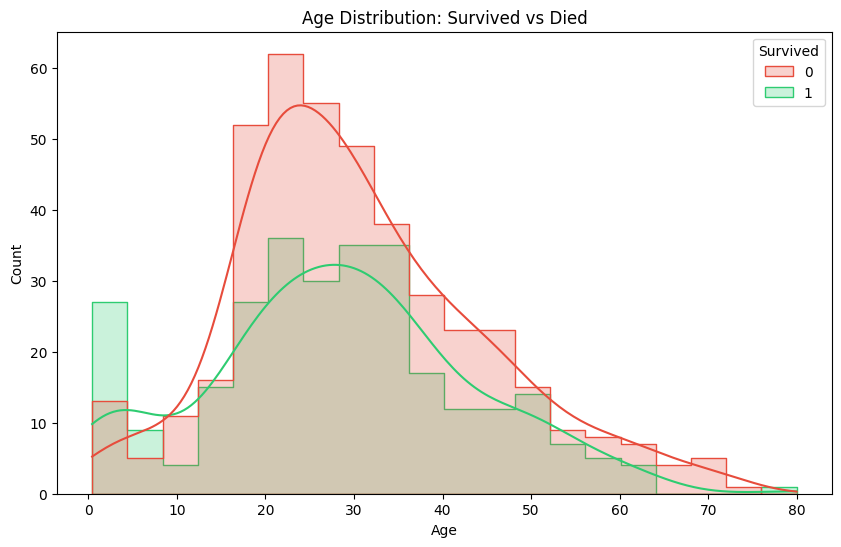

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, palette=custom_palette, element="step")
plt.title("Age Distribution: Survived vs Died")
plt.show()

From the diagram, it is clearly that the children age group mostly from **0 - 10** has more chance to survived and the middle age from **20 - 40** has less chance. The red line and green line is not identical so **Age** is a valueable feature